##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Loading data
sales = pd.read_csv('sales.csv')
store = pd.read_csv('store.csv')

In [3]:
sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

#### Data Exploration

In [4]:
sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [6]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
frames = [sales, store]
final_df = pd.concat(frames)

In [8]:
final_df.head()

Store  DayOfWeek        Date    Sales  Customers  Open  Promo StateHoliday  \
0      1        5.0  2015-07-31   5263.0      555.0   1.0    1.0            0   
1      2        5.0  2015-07-31   6064.0      625.0   1.0    1.0            0   
2      3        5.0  2015-07-31   8314.0      821.0   1.0    1.0            0   
3      4        5.0  2015-07-31  13995.0     1498.0   1.0    1.0            0   
4      5        5.0  2015-07-31   4822.0      559.0   1.0    1.0            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0            1.0       NaN        NaN                  NaN   
1            1.0       NaN        NaN                  NaN   
2            1.0       NaN        NaN                  NaN   
3            1.0       NaN        NaN                  NaN   
4            1.0       NaN        NaN                  NaN   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        NaN                       NaN     NaN   
1                        NaN                       NaN     NaN   
2                        NaN                       NaN     NaN   
3                        NaN                       NaN     NaN   
4                        NaN                       NaN     NaN   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [9]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [10]:
final_df.isnull().sum()

Store                              0
DayOfWeek                       1115
Date                            1115
Sales                           1115
Customers                       1115
Open                            1115
Promo                           1115
StateHoliday                    1115
SchoolHoliday                   1115
StoreType                    1017209
Assortment                   1017209
CompetitionDistance          1017212
CompetitionOpenSinceMonth    1017563
CompetitionOpenSinceYear     1017563
Promo2                       1017209
Promo2SinceWeek              1017753
Promo2SinceYear              1017753
PromoInterval                1017753
dtype: int64

##### Exploratory Data Analysis using Pandas Profiling

In [11]:
# Pandas Profile, show us a resume of dataset
from pandas_profiling import ProfileReport
ProfileReport(final_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Transform the type of 'date' to date time and set to index
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.set_index('Date', inplace=True)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018324 entries, 2015-07-31 to NaT
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1018324 non-null  int64  
 1   DayOfWeek                  1017209 non-null  float64
 2   Sales                      1017209 non-null  float64
 3   Customers                  1017209 non-null  float64
 4   Open                       1017209 non-null  float64
 5   Promo                      1017209 non-null  float64
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  float64
 8   StoreType                  1115 non-null     object 
 9   Assortment                 1115 non-null     object 
 10  CompetitionDistance        1112 non-null     float64
 11  CompetitionOpenSinceMonth  761 non-null      float64
 12  CompetitionOpenSinceYear   761 non-null      float64
 13  Prom

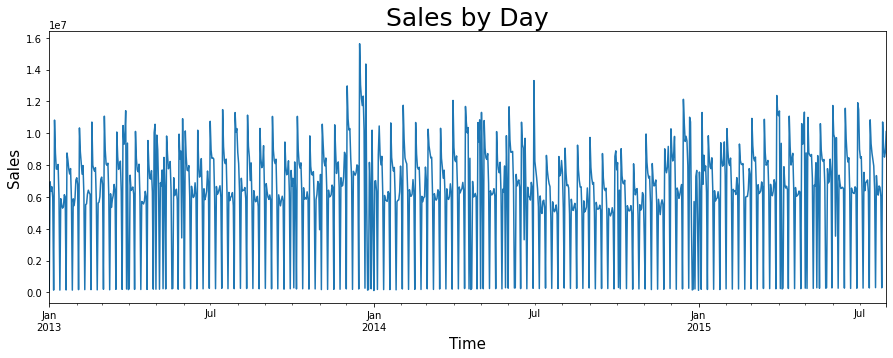

In [14]:
sales_day = pd.DataFrame(final_df['Sales'].resample('D').sum())

sales_day['Sales'].plot(figsize=(15,5))
plt.title('Sales by Day', fontsize=25)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

In [15]:
sales_day.loc[sales_day.index == '2016-12-25']

Empty DataFrame
Columns: [Sales]
Index: []

In [16]:
sales_day.loc[sales_day.index == '2017-01-01']

Empty DataFrame
Columns: [Sales]
Index: []

#### Handling Missing Values

In [17]:
final_df = final_df.fillna(final_df.mean())

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018324 entries, 2015-07-31 to NaT
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1018324 non-null  int64  
 1   DayOfWeek                  1018324 non-null  float64
 2   Sales                      1018324 non-null  float64
 3   Customers                  1018324 non-null  float64
 4   Open                       1018324 non-null  float64
 5   Promo                      1018324 non-null  float64
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1018324 non-null  float64
 8   StoreType                  1115 non-null     object 
 9   Assortment                 1115 non-null     object 
 10  CompetitionDistance        1018324 non-null  float64
 11  CompetitionOpenSinceMonth  1018324 non-null  float64
 12  CompetitionOpenSinceYear   1018324 non-null  float64
 13  Prom

In [19]:
final_df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.018324e+06  1.018324e+06  1.018324e+06  1.018324e+06  1.018324e+06   
mean   5.584293e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219086e+02  1.996297e+00  3.847818e+03  4.641574e+02  3.753336e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.730000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.748000e+03  6.100000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.853000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.018324e+06   1.018324e+06         1.018324e+06   
mean   3.815145e-01   1.786467e-01         5.404901e+03   
std    4.854926e-01   3.828466e-01         2.531180e+02   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         5.404901e+03   
50%    0.000000e+00   0.000000e+00         5.404901e+03   
75%    1.000000e+00   0.000000e+00         5.404901e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count               1.018324e+06              1.018324e+06  1.018324e+06   
mean                7.224704e+00              2.008669e+03  5.121076e-01   
std                 8.775797e-02              1.692677e-01  1.654007e-02   
min                 1.000000e+00              1.900000e+03  0.000000e+00   
25%                 7.224704e+00              2.008669e+03  5.121076e-01   
50%                 7.224704e+00              2.008669e+03  5.121076e-01   
75%                 7.224704e+00              2.008669e+03  5.121076e-01   
max                 1.200000e+01              2.015000e+03  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count     1.018324e+06     1.018324e+06  
mean      2.359545e+01     2.011764e+03  
std       3.345839e-01     3.962713e-02  
min       1.000000e+00     2.009000e+03  
25%       2.359545e+01     2.011764e+03  
50%       2.359545e+01     2.011764e+03  
75%       2.359545e+01     2.011764e+03  
max       5.000000e+01     2.015000e+03

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1018324 entries, 2015-07-31 to NaT
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1018324 non-null  int64  
 1   DayOfWeek                  1018324 non-null  float64
 2   Sales                      1018324 non-null  float64
 3   Customers                  1018324 non-null  float64
 4   Open                       1018324 non-null  float64
 5   Promo                      1018324 non-null  float64
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1018324 non-null  float64
 8   StoreType                  1115 non-null     object 
 9   Assortment                 1115 non-null     object 
 10  CompetitionDistance        1018324 non-null  float64
 11  CompetitionOpenSinceMonth  1018324 non-null  float64
 12  CompetitionOpenSinceYear   1018324 non-null  float64
 13  Prom

##### Label Encoding Categorical Values

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
final_df[ 'StoreType' ]= le.fit_transform(final_df[ 'StoreType' ])   
final_df[ 'Assortment' ]= le.fit_transform(final_df[ 'Assortment' ])    
final_df[ 'PromoInterval' ]= le.fit_transform(final_df[ 'PromoInterval' ])  

In [23]:
X = final_df.drop(['Sales','Customers','StateHoliday'],axis=1)
Y = final_df['Sales']

In [24]:
final_df.shape

(1018324, 17)

##### Train Test Split 

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

##### Standard Scaling using Standard Scaler

In [27]:
std_scaler = StandardScaler()
std_scaler.fit_transform(X_train)

array([[-6.76122159e-01, -4.99646342e-01,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [-1.62695007e+00,  1.00286605e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 2.80920311e-01,  5.02028587e-01,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       ...,
       [-1.53373165e+00, -1.50132127e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 8.30909003e-01,  1.19112233e-03,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 1.14785164e+00, -4.99646342e-01,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02]])

In [28]:
X_test_scaled = std_scaler.transform(X_test)

In [29]:
X_test_scaled

array([[ 1.38711226e+00,  1.00286605e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 1.69784033e+00,  5.02028587e-01,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 1.55179814e+00,  1.00286605e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       ...,
       [-3.00141189e-01,  1.00286605e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [ 1.11056427e+00, -1.50132127e+00,  4.52423703e-01, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02],
       [-4.74148910e-01,  1.19112233e-03, -2.21272821e+00, ...,
         1.07267540e-04, -1.38174504e-03,  2.23789840e-02]])

#### Model Fitting and Model Training

In [30]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [31]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr_model.predict(X_test_scaled)

##### Accuracy Metrics using R2 Score & RMSE

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

6620.298724617936


In [34]:
from sklearn.metrics import r2_score
R2_score=R2_score=r2_score(y_test,y_pred)
print(R2_score)

-1.934172577901648


In [35]:
## Adjusted R square
#display adjusted R-squared
1 - (1-R2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-1.9343742887589555

##### Linear Model Intercept

In [36]:
print(lr_model.intercept_)

1256.0326257007255


In [37]:
print(lr_model.coef_)

[ 6.30483886e-02 -1.07514371e+02  5.85769965e+03  2.06565233e+03
  6.57195898e+01  1.58659234e-01 -5.40821112e-01  2.88759464e-05
  5.87741792e-01  6.01237262e-02 -4.10763276e-01  1.74148922e-03
 -4.34686576e-01 -4.84338493e-02]


<AxesSubplot:ylabel='Density'>

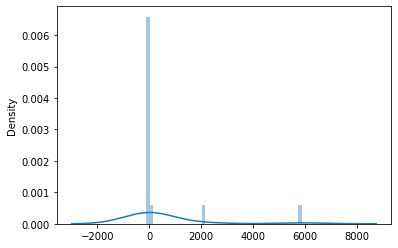

In [38]:
sns.distplot(lr_model.coef_)